In [0]:
  !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Expirement 4 using ELA

In [0]:
import os

from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
!wget 'https://fyp-content-bucket.s3.amazonaws.com/CASIA_ELA.zip.7z'

--2019-11-29 13:06:38--  https://fyp-content-bucket.s3.amazonaws.com/CASIA_ELA.zip.7z
Resolving fyp-content-bucket.s3.amazonaws.com (fyp-content-bucket.s3.amazonaws.com)... 52.216.27.172
Connecting to fyp-content-bucket.s3.amazonaws.com (fyp-content-bucket.s3.amazonaws.com)|52.216.27.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1375594296 (1.3G) [application/x-7z-compressed]
Saving to: ‘CASIA_ELA.zip.7z’

CASIA_ELA.zip.7z    100%[===================>]   1.28G  36.6MB/s    in 37s     

2019-11-29 13:07:16 (35.8 MB/s) - ‘CASIA_ELA.zip.7z’ saved [1375594296/1375594296]



In [0]:
!7z e CASIA_ELA.zip.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 1375594296 bytes (1312 MiB)

Extracting archive: CASIA_ELA.zip.7z
--
Path = CASIA_ELA.zip.7z
Type = 7z
Physical Size = 1375594296
Headers Size = 130
Method = LZMA2:26
Solid = -
Blocks = 1

  0%      3% - CASIA_ELA.zip                      7% - CASIA_ELA.zip                     10% - CASIA_ELA.zip                     14% - CASIA_ELA.zip                     16% - CASIA_ELA.zip                     20% - CASIA_ELA.zip                     25% - CASIA_ELA.zip

In [0]:
!unzip CASIA_ELA.zip

Archive:  CASIA_ELA.zip
   creating: CASIA_ELA/
   creating: CASIA_ELA/Valid/
  inflating: CASIA_ELA/.DS_Store     
  inflating: __MACOSX/CASIA_ELA/._.DS_Store  
   creating: CASIA_ELA/Test/
   creating: CASIA_ELA/Train/
   creating: CASIA_ELA/Valid/Tampered/
   creating: CASIA_ELA/Valid/Authentic/
   creating: CASIA_ELA/Test/Tampered/
  inflating: CASIA_ELA/Test/.DS_Store  
  inflating: __MACOSX/CASIA_ELA/Test/._.DS_Store  
   creating: CASIA_ELA/Test/Authentic/
   creating: CASIA_ELA/Train/Tampered/
  inflating: CASIA_ELA/Train/.DS_Store  
  inflating: __MACOSX/CASIA_ELA/Train/._.DS_Store  
   creating: CASIA_ELA/Train/Authentic/
  inflating: CASIA_ELA/Valid/Tampered/Tp_S_CNN_S_N_arc00041_arc00041_01084.ela.png  
  inflating: CASIA_ELA/Valid/Tampered/Tp_S_CRN_S_N_nat00098_nat00098_10063.ela.png  
  inflating: CASIA_ELA/Valid/Tampered/Tp_S_NND_S_N_ani00088_ani00088_00208.ela.png  
  inflating: CASIA_ELA/Valid/Tampered/Tp_S_NRN_M_N_arc10125_arc10125_11887.ela.png  
  inflating: CASIA_E

In [0]:
path = Path("/root/.fastai/data/CASIA_ELA"); path

PosixPath('/root/.fastai/data/CASIA_ELA')

In [0]:
path_to_test = Path("/root/.fastai/data/Test")
test = ImageList.from_folder(path_to_test)

In [0]:
data = ImageDataBunch.from_folder(path, train='Train', valid='Valid', 
                                  ds_tfms = get_transforms(do_flip=False), size=(256, 384), bs=64)

In [0]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (7605 items)
x: ImageList
Image (3, 256, 384),Image (3, 256, 384),Image (3, 256, 384),Image (3, 256, 384),Image (3, 256, 384)
y: CategoryList
Authentic,Authentic,Authentic,Authentic,Authentic
Path: /root/.fastai/data/CASIA_ELA;

Valid: LabelList (4163 items)
x: ImageList
Image (3, 256, 384),Image (3, 256, 384),Image (3, 256, 384),Image (3, 256, 384),Image (3, 256, 384)
y: CategoryList
Authentic,Authentic,Authentic,Authentic,Authentic
Path: /root/.fastai/data/CASIA_ELA;

Test: None

In [0]:
data.add_test(test)

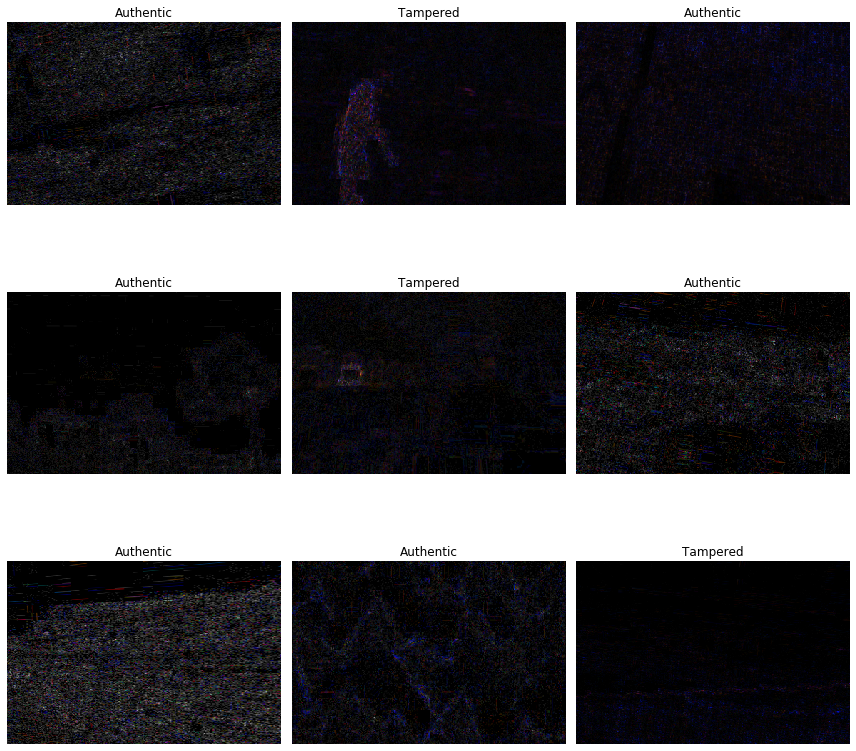

In [0]:
data.show_batch(rows=3, figsize=(12,12))

In [0]:
print(data.classes)
len(data.classes),data.c

['Authentic', 'Tampered']


(2, 2)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 90.7MB/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


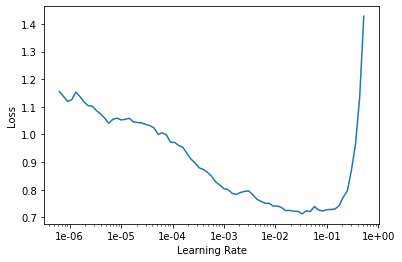

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
lr = 1e-02

In [0]:
learn.fit_one_cycle(20, lr)

epoch,train_loss,valid_loss,error_rate,time
0,0.395515,0.249842,0.105453,02:24
1,0.253270,0.232270,0.099688,02:20
2,0.226787,0.238923,0.092001,02:18
3,0.221308,0.325957,0.101369,02:20
4,0.213103,0.217356,0.087197,02:20
5,0.199577,0.293340,0.156858,02:16
6,0.186702,0.317892,0.108335,02:17
7,0.170129,0.200792,0.071583,02:12
8,0.154259,0.182341,0.075426,02:11
9,0.158191,0.275922,0.146529,02:13


In [0]:
learn.save('ela-exp2-attempt-1-resnet50')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


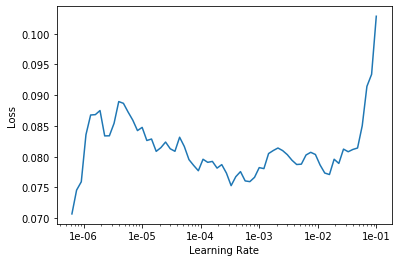

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(15, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,error_rate,time
0,0.076511,0.125375,0.053807,02:26
1,0.083759,0.154715,0.059572,02:26
2,0.099408,0.133412,0.058131,02:26
3,0.101591,0.169086,0.064617,02:27
4,0.097113,0.166818,0.057891,02:27
5,0.108560,0.144437,0.059332,02:26
6,0.101052,0.118966,0.053807,02:27
7,0.093030,0.153993,0.063416,02:27
8,0.089324,0.132023,0.057411,02:27
9,0.080703,0.120508,0.050444,02:27


In [0]:
learn.save('ela-exp2-attempt-2-resnet50')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
interp.most_confused(min_val=2)

[('Tampered', 'Authentic', 111), ('Authentic', 'Tampered', 102)]

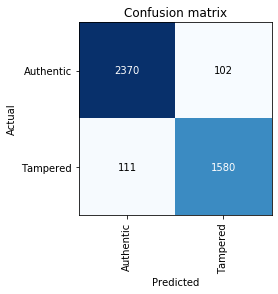

In [0]:
interp.plot_confusion_matrix()

In [0]:
learn.export()

In [0]:
!wget 'https://fyp-content-bucket.s3.amazonaws.com/export.pkl'

--2019-11-29 13:15:35--  https://fyp-content-bucket.s3.amazonaws.com/export.pkl
Resolving fyp-content-bucket.s3.amazonaws.com (fyp-content-bucket.s3.amazonaws.com)... 52.216.10.187
Connecting to fyp-content-bucket.s3.amazonaws.com (fyp-content-bucket.s3.amazonaws.com)|52.216.10.187|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102787733 (98M) [application/x-www-form-urlencoded]
Saving to: ‘export.pkl’

export.pkl          100%[===================>]  98.03M  29.7MB/s    in 3.3s    

2019-11-29 13:15:39 (29.7 MB/s) - ‘export.pkl’ saved [102787733/102787733]



In [0]:
learn = load_learner(path)

In [0]:
path = '/content/data/Test/'
folders = os.listdir(path)
for folder in folders:
    if os.path.isdir(path + folder):
        new_path = os.path.join(path + folder + '/')
        print(new_path)
        for f in os.listdir(new_path):
            img = open_image(new_path + f)
            pred_class,pred_idx,confidence = learn.predict(img)
            if str(pred_class) == 'Tampered':
                conf = float(confidence[1])
            else:
                conf = float(confidence[0])
            conf = conf * 100
            if conf >=65:
                print('Predicted: {} ------ Confidence: {:.3f}% ------ Actual: {}'.format(pred_class, conf, folder))
            

/content/data/Test/Authentic/
Predicted: Authentic ------ Confidence: 100.000% ------ Actual: Authentic
Predicted: Authentic ------ Confidence: 100.000% ------ Actual: Authentic
Predicted: Authentic ------ Confidence: 100.000% ------ Actual: Authentic
Predicted: Authentic ------ Confidence: 99.999% ------ Actual: Authentic
Predicted: Authentic ------ Confidence: 100.000% ------ Actual: Authentic
Predicted: Authentic ------ Confidence: 100.000% ------ Actual: Authentic
Predicted: Authentic ------ Confidence: 100.000% ------ Actual: Authentic
Predicted: Authentic ------ Confidence: 100.000% ------ Actual: Authentic
Predicted: Authentic ------ Confidence: 100.000% ------ Actual: Authentic
Predicted: Authentic ------ Confidence: 100.000% ------ Actual: Authentic
Predicted: Authentic ------ Confidence: 100.000% ------ Actual: Authentic
Predicted: Authentic ------ Confidence: 99.985% ------ Actual: Authentic
Predicted: Authentic ------ Confidence: 100.000% ------ Actual: Authentic
Predicted: